In [26]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [27]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [153]:
articleType_train_feature_csv = pd.read_csv('Features/articleType_train_feature.csv')
articleType_test_feature_csv = pd.read_csv('Features/articleType_test_feature.csv')

In [155]:
X_articleType_train = articleType_train_feature_csv.drop(['FileName', 'articleType'], axis = 1)
Y_articleType_train = articleType_train_feature_csv['articleType']
X_articleType_test = articleType_test_feature_csv.drop(['FileName', 'articleType'], axis = 1)
Y_articleType_test = articleType_test_feature_csv['articleType']
print(X_articleType_train.shape)
print(Y_articleType_train.shape)
print(X_articleType_test.shape)
print(Y_articleType_test.shape)

(27863, 64)
(27863,)
(13725, 64)
(13725,)


# Finding best value of k

1
k:1 acc:0.8587249544626594
2
k:2 acc:0.8587249544626594
3
k:3 acc:0.8587249544626594
4
k:4 acc:0.8595992714025501
5
k:5 acc:0.8599635701275046
6
k:6 acc:0.8605464480874317
7
k:7 acc:0.863023679417122
8
k:8 acc:0.863023679417122
9
k:9 acc:0.863023679417122
10
k:10 acc:0.863023679417122
11
k:11 acc:0.863023679417122
12
k:12 acc:0.863023679417122
13
k:13 acc:0.863023679417122
14
k:14 acc:0.863023679417122
15
k:15 acc:0.863023679417122
16
k:16 acc:0.863023679417122
17
k:17 acc:0.863023679417122
18
k:18 acc:0.863023679417122
19
k:19 acc:0.863023679417122
20
k:20 acc:0.863023679417122
21
k:21 acc:0.863023679417122
22
k:22 acc:0.863023679417122
23
k:23 acc:0.863023679417122
24
k:24 acc:0.863023679417122
25
k:25 acc:0.863023679417122
26
k:26 acc:0.863023679417122
27
k:27 acc:0.863023679417122
28
k:28 acc:0.863023679417122
29
k:29 acc:0.863023679417122
30
k:30 acc:0.863023679417122
31
k:31 acc:0.863023679417122
32
k:32 acc:0.863023679417122
33
k:33 acc:0.863023679417122
34
k:34 acc:0.86302367

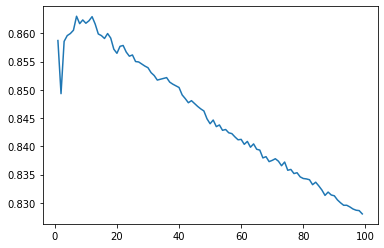

max acc at k=7 acc of 0.863023679417122


In [15]:
lix = []
liy = []
index=0
acc=0
for k in range(1, 100):
    print(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_articleType_train, Y_articleType_train)
    liy.append(neigh.score(X_articleType_test, Y_articleType_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)
    print("k:"+str(k)+" acc:"+str(acc))

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [20]:
knn=KNeighborsClassifier(n_neighbors=7)

In [23]:
knn.fit(X_articleType_train, Y_articleType_train)
accuracy=knn.predict(X_articleType_test)
print(accuracy)

['Sandals' 'Track Pants' 'Formal Shoes' ... 'Briefs' 'Kurtas' 'Wallets']


In [25]:
c=0
ic=0
for i in range(len(accuracy)):
    if(Y_test[i]==accuracy[i]):
        c+=1
    else:
        ic+=1
print(c/len(accuracy))
print(ic/len(accuracy))

0.863023679417122
0.13697632058287795


In [37]:
nn=NearestNeighbors(algorithm='auto',metric='cosine')
nn.fit(X_articleType_train,Y_articleType_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [57]:
X_articleType_train.iloc[0].to_numpy().reshape(1,-1)

array([[-7.46543600e-01, -6.88240470e-01, -1.58012960e+00,
        -9.29012200e-02, -4.67282440e-03, -4.85445600e-01,
         1.41233240e+00,  2.60357640e+00, -4.42100840e-02,
         4.93223100e+00, -9.70925750e-01,  1.01849985e+01,
        -2.75318060e-01,  3.32885380e+00,  1.91261370e+00,
        -7.00148050e-01, -2.84437240e-01, -5.58858800e-01,
        -1.08035890e+00, -7.51229600e-01,  2.56265800e+00,
        -1.59079590e+00,  2.75862070e+00, -4.37677350e-01,
        -5.91237700e-01, -8.07310100e-01, -3.82636640e-01,
        -3.15120850e-02,  3.94271090e+00, -8.43913850e-01,
        -1.54860220e+00, -5.13061460e-01,  8.90514850e+00,
         1.04746390e+01, -1.15934900e+00, -5.58605200e-01,
        -1.38336070e+00, -8.53875940e-01, -1.35670190e+00,
        -1.41388520e-01,  4.46829000e+00, -5.83488800e-01,
        -1.83213030e+00, -5.60616430e-01, -2.51573180e-01,
        -1.27892720e+00, -1.84303590e+00, -4.95493260e-01,
        -6.49601640e-01, -1.27786330e+00, -9.91587760e-0

In [146]:
distance,indices=nn.kneighbors(X_articleType_train.iloc[51].to_numpy().reshape(1,-1),n_neighbors=11)

In [147]:
print(distance,indices)

[[1.11022302e-16 1.23635231e-01 1.36328014e-01 1.39615841e-01
  1.41506707e-01 1.42035335e-01 1.44740912e-01 1.47273300e-01
  1.50291407e-01 1.51769542e-01 1.52235573e-01]] [[   51  9887 23344 18857 14535 19735 12924 20339 22215 19390 24497]]


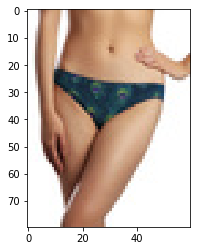

In [148]:
im=img.imread('Dataset/images/'+articleType_train_feature_csv.iloc[51][0])
plt.imshow(im)

In [149]:
indices=indices[0]

In [150]:
filenames=[]
for i in range(len(indices)):{
    filenames.append(articleType_train_feature_csv.iloc[indices[i]][0])
}
print(filenames)

['50999.jpg', '47515.jpg', '15782.jpg', '15814.jpg', '59753.jpg', '54481.jpg', '31897.jpg', '51037.jpg', '50625.jpg', '47259.jpg', '47267.jpg']


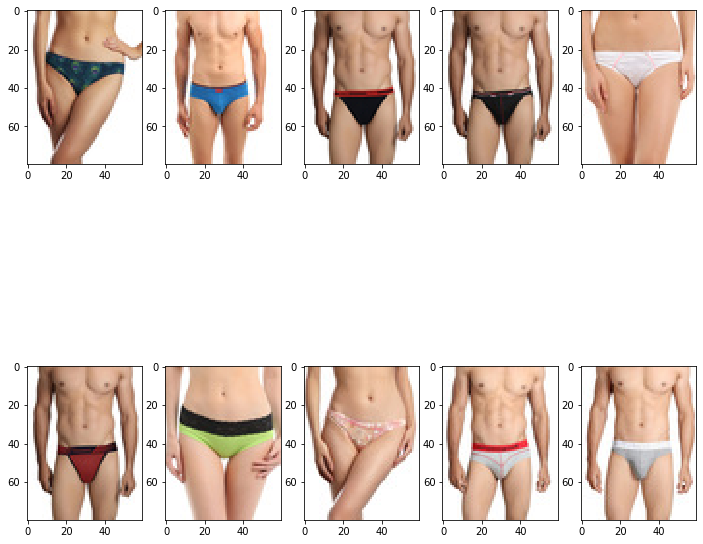

In [151]:
f, axarr = plt.subplots(2,5, figsize = (12,12))
index = 0
for i in range(2):
    for j in range(5):
        im = img.imread('Dataset/images/'+filenames[index]) 
        axarr[i,j].imshow(im)
        index = index +1
